In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
#np.random.seed(10)的作用：使得隨機數據可預測

Using TensorFlow backend.


In [2]:
#取得Keras CIFAR10 Dataset, 並分成Training 與 Test set
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化, 並設定 data array 為浮點數
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE, 並查看維度資訊
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
# 宣告採用序列模型
model = Sequential()

In [8]:
#卷積層1與池化層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
#卷積層3與池化層3
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層4與池化層4
model.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())

In [14]:
#建立全網路連接層
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

In [15]:
#建立輸出層
model.add(Dense(10, activation='softmax'))

In [16]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)        

In [17]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [18]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [19]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 62s 2ms/step - loss: 1.6186 - accuracy: 0.3973 - val_loss: 1.3183 - val_accuracy: 0.5149
Epoch 2/12
37500/37500 [==============================] - 63s 2ms/step - loss: 1.1635 - accuracy: 0.5810 - val_loss: 1.0478 - val_accuracy: 0.6249
Epoch 3/12
37500/37500 [==============================] - 66s 2ms/step - loss: 0.9525 - accuracy: 0.6597 - val_loss: 0.9491 - val_accuracy: 0.6669
Epoch 4/12
37500/37500 [==============================] - 62s 2ms/step - loss: 0.8011 - accuracy: 0.7149 - val_loss: 0.8815 - val_accuracy: 0.6927
Epoch 5/12
37500/37500 [==============================] - 62s 2ms/step - loss: 0.6772 - accuracy: 0.7605 - val_loss: 0.8627 - val_accuracy: 0.6987
Epoch 6/12
37500/37500 [==============================] - 61s 2ms/step - loss: 0.5685 - accuracy: 0.8023 - val_loss: 0.8111 - val_accuracy: 0.7194
Epoch 7/12
37500/37500 [==============================] - 61s 2ms/st

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
    plt.show()

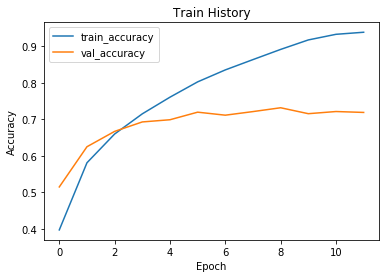

In [21]:
show_train_history('accuracy','val_accuracy')

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [11]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [12]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [13]:
# 選用 "binary _crossentropy" 查看Train/test accurancy and loss rate
from keras import losses

model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])

In [14]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 51s 1ms/step - loss: 0.3255 - accuracy: 0.9000 - val_loss: 0.3228 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 49s 1ms/step - loss: 0.3216 - accuracy: 0.9000 - val_loss: 0.3205 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 48s 1ms/step - loss: 0.3182 - accuracy: 0.9000 - val_loss: 0.3178 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.3141 - accuracy: 0.9000 - val_loss: 0.3142 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.3087 - accuracy: 0.9000 - val_loss: 0.3097 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 53s 1ms/step - loss: 0.3033 - accuracy: 0.9000 - val_loss: 0.3049 - val_accuracy: 0.9000
Epoch 7/12
37500/37500 [==============================] - 48s 1ms/st

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

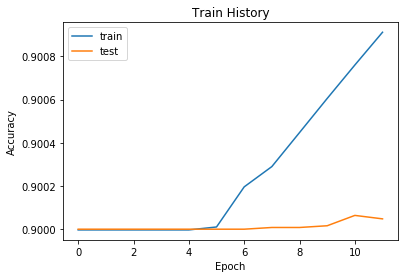

In [16]:
show_train_history('accuracy','val_accuracy')

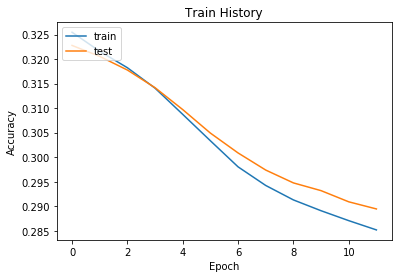

In [17]:
show_train_history('loss','val_loss')

In [18]:
# 選用 "mean_squared_error" 查看Train/test accurancy and loss rate
from keras import losses

model.compile(loss='mean_squared_error',optimizer='sgd', metrics=['accuracy'])

In [19]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 49s 1ms/step - loss: 0.0813 - accuracy: 0.3085 - val_loss: 0.0826 - val_accuracy: 0.3306
Epoch 2/12
37500/37500 [==============================] - 59s 2ms/step - loss: 0.0811 - accuracy: 0.3079 - val_loss: 0.0824 - val_accuracy: 0.3327
Epoch 3/12
37500/37500 [==============================] - 56s 2ms/step - loss: 0.0810 - accuracy: 0.3104 - val_loss: 0.0823 - val_accuracy: 0.3342
Epoch 4/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.0807 - accuracy: 0.3139 - val_loss: 0.0822 - val_accuracy: 0.3362
Epoch 5/12
37500/37500 [==============================] - 53s 1ms/step - loss: 0.0808 - accuracy: 0.3140 - val_loss: 0.0820 - val_accuracy: 0.3398
Epoch 6/12
37500/37500 [==============================] - 55s 1ms/step - loss: 0.0806 - accuracy: 0.3185 - val_loss: 0.0819 - val_accuracy: 0.3393
Epoch 7/12
37500/37500 [==============================] - 57s 2ms/st

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

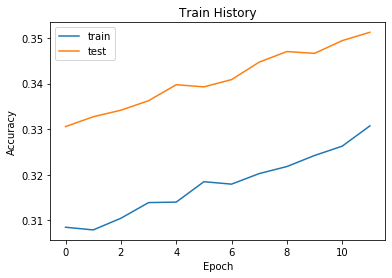

In [21]:
show_train_history('accuracy','val_accuracy')

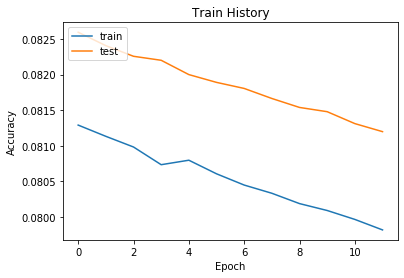

In [22]:
show_train_history('loss','val_loss')